## Data Science Project: Titanic Survival

#### The project is mainly designed to predict the who is more likely to survive the disaster. The project covers the application of feature engineering to develop new features to increase the model prediction. It basically revolves around finding the who is more likely to survive the crash like men, women, children, passengers in 1st, 2nd or 3rd class, passenger with more family members or less, young or old people, etc.

In [1]:
#Getting started with importing the required libraries for the analysis and machine learning models.
import numpy as np
import pandas as pd
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

C:\Users\savan\Anaconda3\New folder\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#reading the train dataset from the computer location.
train = pd.read_csv('C:/Users/savan/Desktop/DS/Projects/titanic_train.csv')

In [3]:
#reading the test dataset from the computer location.
test = pd.read_csv('C:/Users/savan/Desktop/DS/Projects/titanic_test.csv')

In [6]:
#Looking at the first five rows of the train dataset. Our response variable here in this project is 'Survived'.
#We are going to predict our response variable 'Survived' from other feature variables.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Looking at the first five rows of the test dataset. Here, the response variable is not given since it is testing dataset.
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#Checking how many total rows and columns are there in train dataset.
train.shape

(891, 12)

In [8]:
##Checking how many total rows and columns are there in test dataset.
test.shape

(418, 11)

In [8]:
#Checking the number of non-null values and datatypes.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
#Checking the Null values in the train dataset. Looks like there are too many null values in Cabin and Age columns.
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

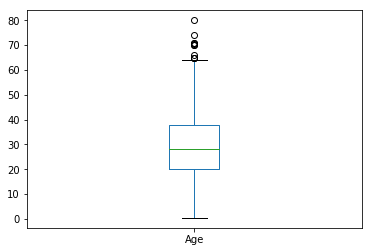

In [10]:
#let's check the outliers in the Age Columns. It looks like there are some very old people on the higher end of the distribution.
train.Age.plot(kind = 'box')

In [11]:
#Checking some descriptive statistics terms in Age column like min, max, mean and median.
#Median will be more informative in this column since it is slightly right skewed.
print('The minimum Age is:', train.Age.min())
print('The maximum Age is:', train.Age.max())
print('The average Age is:', train.Age.mean())
print('The median Age is:', train.Age.median())

The minimum Age is: 0.42
The maximum Age is: 80.0
The average Age is: 29.69911764705882
The median Age is: 28.0


C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


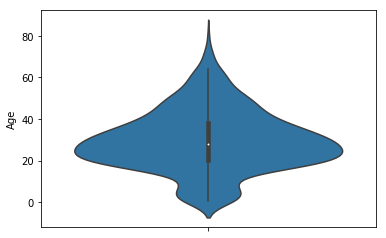

In [12]:
#Visualizing the distribution of the Age column. It makes sense since there is bulge around the mean and median values.
sns.violinplot(y = train.Age, data = train)

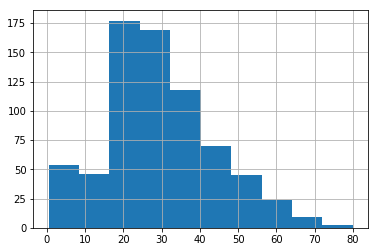

In [25]:
#Checking the number of number of datapoints are there for the same age.
train.Age.hist()

In [4]:
#Filling the missing values in the Age column with median value.
train.Age.fillna(train.Age.median(), inplace = True)

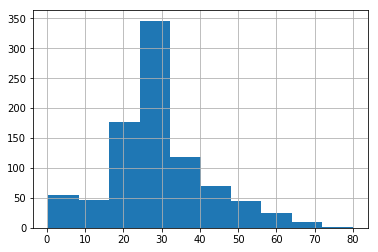

In [14]:
#Now checking how it affected the whole distribution with a histogram.
train.Age.hist()

In [15]:
#There are 687 missing values in the Cabin column.
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
#Let's check the unique values in the Cabin column and see if we can derive something from that.
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [5]:
#It looks like we cannot derived anything from the Cabin column values. 
#Since it is not much informative as compared to other feature variables, it is not a bad idea to drop that column.
train.drop(columns = 'Cabin', inplace= True)

In [19]:
#Now, we have only left with the two missing values in Embarked column.
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [6]:
#Checking to see which rows for which Embarked is null.
train[train.Embarked.isna() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [23]:
#Checking to the different values and their counts in Embarked column.
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
#It makes sense to fill those missing values with 'S' since there is more probability of occurance of 'S'.
train.Embarked.fillna(value= 'S', inplace = True)

In [8]:
#Last check for the missing values. There are no missing values now and we can go ahead for the analysis.
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
#Since 'Sex' column is categorical, it is important to convert that to numerical values for machine learning.
train['gender'] = train.Sex.map({'male':1, 'female':0})

In [98]:
#Checking the new 'gender' column now. Actually we don't want our old 'Sex' column. 
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,ANULL,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,ANULL,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,ANULL,S,1


In [10]:
#Dropping the 'Sex' column.
train.drop(columns = 'Sex', inplace = True)

In [28]:
#Checking and understanding the descriptive statistics of the train dataframe.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.647587
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


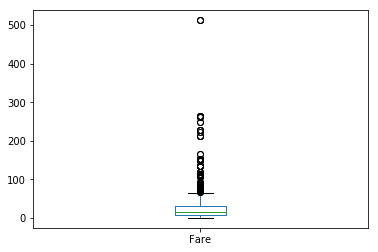

In [11]:
#Let's check the distribution of the Fare column.
train.Fare.plot(kind = 'box')

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


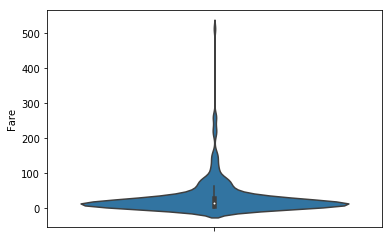

In [30]:
#Understanding the distribution of the Fare column. Looks like there are lot more outliers on the higher end.
sns.violinplot(y = train.Fare, data = train)

In [12]:
#Let's check if there are any duplicated columns in the dataframe.
train.duplicated().sum()

0

In [13]:
#Let's retrieve all the index values for which the Fare is greater than 200.
train[train.Fare >= 200].index

Int64Index([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679,
            689, 700, 716, 730, 737, 742, 779],
           dtype='int64')

In [14]:
#Let's drop those rows for which the Fare is greater than 200 as it is unnecessarily skewing the distribution.
train.drop(index = train[train.Fare >= 200].index, inplace=True)

In [15]:
#Shape of the train dataframe
train.shape

(871, 11)

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


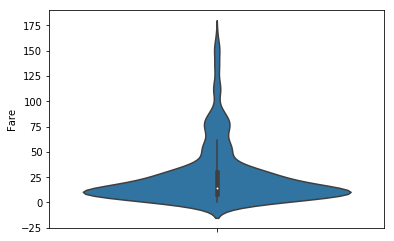

In [35]:
#Now check the distribution of the Fare column after removing some of the outliers.
sns.violinplot(y = train.Fare, data = train)

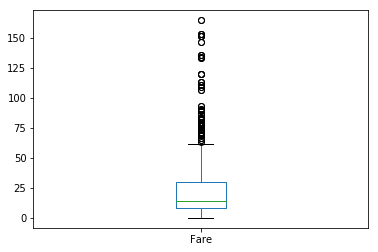

In [36]:
#Box plot of the Fare column. Looks like there are still outliers.
train.Fare.plot(kind = 'box')

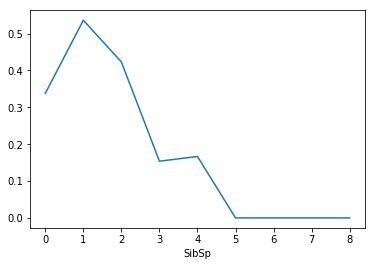

In [11]:
#With how many Siblings and Spouse you are likely going to survive the disaster?
train.groupby(['SibSp'])['Survived'].mean().plot()

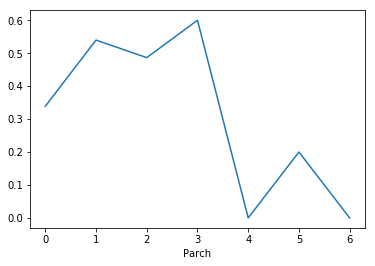

In [37]:
#With how many parents/childrens you are likely to survive the disaster?
train.groupby(['Parch'])['Survived'].mean().plot()

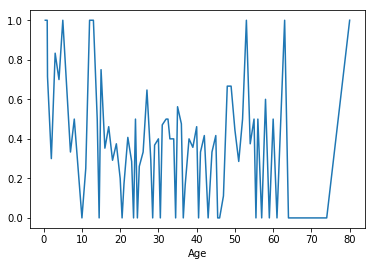

In [38]:
#Which age group has more chance of survival?
train.groupby(['Age'])['Survived'].mean().plot()

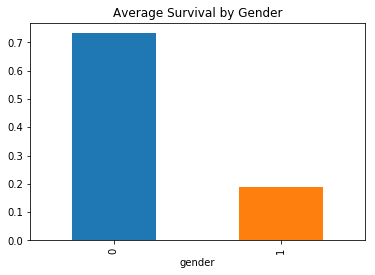

In [39]:
#Who has more survival rate: Male or Female?
train.groupby(['gender'])['Survived'].mean().plot(x = 'Gender', y = 'Mean Survival', title = 'Average Survival by Gender', kind = 'bar')


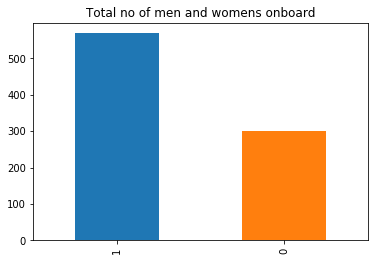

In [40]:
#Total number of men and women on board. There are more men on board and that's the reason it offset it's survival rate.
train.gender.value_counts().plot(kind = 'bar', title = 'Total no of men and womens onboard')

In [16]:
#Getting more deeper into splitting the names and aiming to retrieve name annotation.
def get_element(my_list, position):
    return my_list[position]

In [17]:
#Splitting the full name by ',' and then getting the first name for an ex. Mr. Savan
x = train.Name.str.split(',').apply(get_element, position = 1)

In [18]:
#Creating a new column 'annotation'.
train['annotation'] = x.str.split('.').apply(get_element, position = 0)

In [19]:
#Let's see how many different annotation are there with their counts.
train.annotation.value_counts()

 Mr              509
 Miss            173
 Mrs             122
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 the Countess      1
 Lady              1
 Sir               1
 Ms                1
 Jonkheer          1
 Don               1
 Capt              1
 Mme               1
Name: annotation, dtype: int64

In [20]:
#The chance of survival based on the passenger's annotation.
train.groupby(['annotation'])['Survived'].mean()

annotation
 Capt            0.000000
 Col             0.500000
 Don             0.000000
 Dr              0.428571
 Jonkheer        0.000000
 Lady            1.000000
 Major           0.500000
 Master          0.575000
 Miss            0.682081
 Mlle            1.000000
 Mme             1.000000
 Mr              0.155206
 Mrs             0.786885
 Ms              1.000000
 Rev             0.000000
 Sir             1.000000
 the Countess    1.000000
Name: Survived, dtype: float64

In [47]:
#First five rows of our dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,gender,annotation
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1,Mr


In [21]:
#Getting dummy values for annotation and concating it with the main dataframe
cnct = pd.get_dummies(train.annotation, prefix= 'annot')
concat = [train, cnct]
train = pd.concat(concat, axis = 1)

In [161]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,annot_ Master,annot_ Miss,annot_ Mlle,annot_ Mme,annot_ Mr,annot_ Mrs,annot_ Ms,annot_ Rev,annot_ Sir,annot_ the Countess
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,ANULL,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,ANULL,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,ANULL,...,0,0,0,0,1,0,0,0,0,0


In [162]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender,annot_ Capt,annot_ Col,...,annot_ Master,annot_ Miss,annot_ Mlle,annot_ Mme,annot_ Mr,annot_ Mrs,annot_ Ms,annot_ Rev,annot_ Sir,annot_ the Countess
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,...,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,445.319173,0.376579,2.338691,29.327405,0.517796,0.366246,26.530170,0.653272,0.001148,0.002296,...,0.045924,0.198622,0.002296,0.001148,0.584386,0.140069,0.001148,0.006889,0.001148,0.001148
std,257.761917,0.484806,0.821469,13.041148,1.101448,0.792325,29.351184,0.476202,0.033884,0.047891,...,0.209441,0.399192,0.047891,0.033884,0.493111,0.347258,0.033884,0.082759,0.033884,0.033884
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.862500,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,665.500000,1.000000,3.000000,35.000000,1.000000,0.000000,30.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,164.866700,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
#Let's check the null values in the test dataframe
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

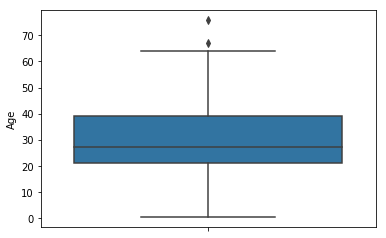

In [169]:
#Are there any outliers in Age as we found in train dataset.
sns.boxplot(y = test.Age, data = test)

In [23]:
#The descriptive statistics of the 'Age' column.
test.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [24]:
#Filling NA values using the median, as it better representation of the distribution.
test.Age.fillna(test.Age.median(), inplace = True)

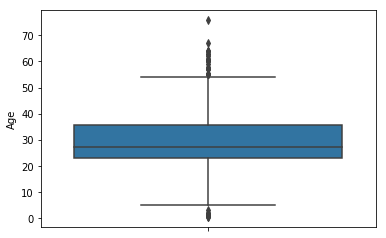

In [52]:
#Checking the distribution after filling in the missing values.
sns.boxplot(y = test.Age, data = test)

In [25]:
#Dropping the 'Cabin' column of test dataframe since it is not very informative
test.drop(columns = 'Cabin', inplace = True)

In [26]:
#Checking the shape of the test dataframe
test.shape

(418, 10)

In [27]:
#Convert the 'Sex' column of test dataframe to numerical variable using map function.
test.Sex = test.Sex.map({'male': 1, 'female':0})

In [28]:
#Checking the null values in the test dataframe
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [29]:
test[test.Fare.isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",1,60.5,0,0,3701,NaN,S


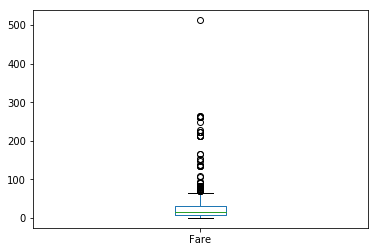

In [30]:
#Checking the outliers in the 'Fare' column.
test.Fare.plot(kind = 'box')

In [31]:
#Descriptive statistics of the 'Fare'. Median is 14.4 while mean is 35.6, it is right skewed
test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [32]:
#Looking at the row, where the Fare is null
test[test.Fare.isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",1,60.5,0,0,3701,NaN,S


In [33]:
#Filling NA with median value.
test.Fare.fillna(test.Fare.median(), inplace = True)

In [34]:
#Finally, there are no null values in the test dataframe.
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [35]:
#Retrieving annotation for the test dataframe
y = test.Name.str.split(',').apply(get_element, position = 1)
test['annotation'] = y.str.split('.').apply(get_element, position = 0)

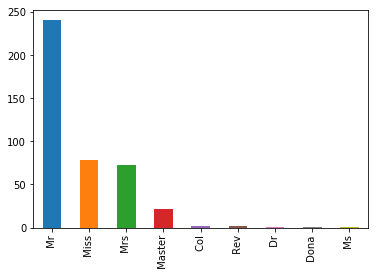

In [36]:
#How many people with different annotation are there in the test dataframe?
test.annotation.value_counts().plot(kind = 'bar')

In [37]:
#Getting dummy values for annotation and concating it with the main test dataframe
cnct = pd.get_dummies(test.annotation, prefix= 'annot', dtype='float64')
concat = [test, cnct]
test = pd.concat(concat, axis = 1)

In [43]:
#Now looking at the first five rows of the test dataframe.
test.head()

,PassengerId,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,...,annotation,annot_ Col,annot_ Dona,annot_ Dr,annot_ Master,annot_ Miss,annot_ Mr,annot_ Mrs,annot_ Ms,annot_ Rev
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,...,Mr,0,0,0,0,0,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,...,Mrs,0,0,0,0,0,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,...,Mr,0,0,0,0,0,1,0,0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,...,Mr,0,0,0,0,0,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,...,Mrs,0,0,0,0,0,0,1,0,0


In [194]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,annot_ Master,annot_ Miss,annot_ Mlle,annot_ Mme,annot_ Mr,annot_ Mrs,annot_ Ms,annot_ Rev,annot_ Sir,annot_ the Countess
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,ANULL,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,ANULL,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,ANULL,...,0,0,0,0,1,0,0,0,0,0


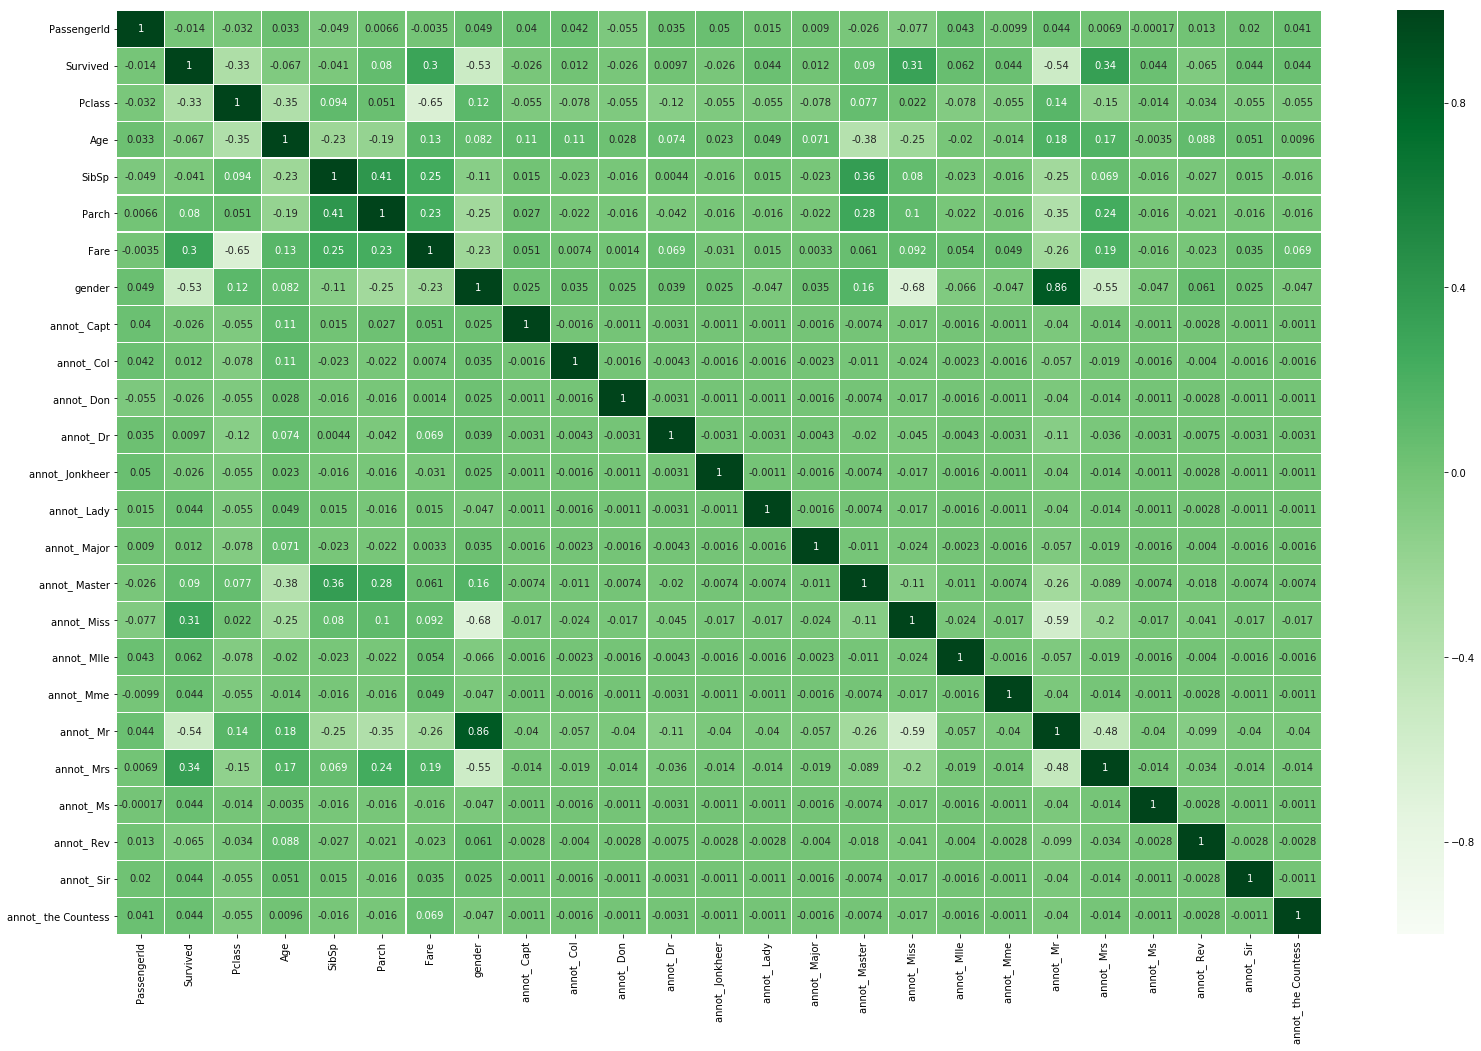

In [38]:
#Checking the correlation between feature variables and response variable in training dataframe
corr1 = train.corr()
plt.figure(figsize = (27, 17))
sns.heatmap(corr1, annot=True, linewidths=0.1, vmin = -1, cmap = 'Greens')

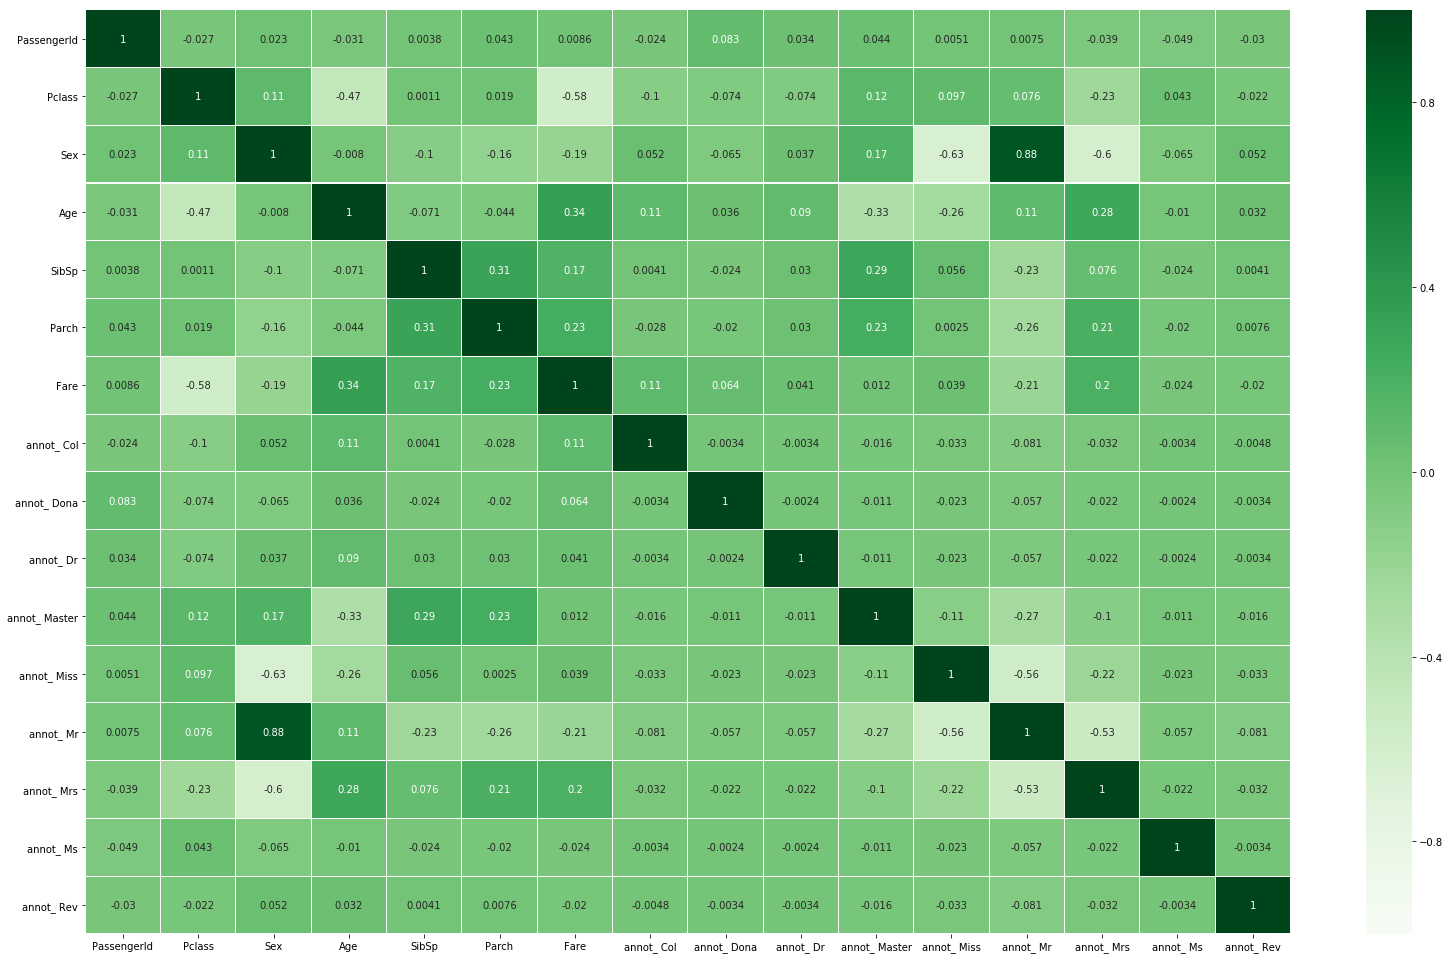

In [39]:
#Checking the correlation between feature variables and response variable in testing dataframe
corr = test.corr()
plt.figure(figsize = (27, 17))
sns.heatmap(corr, annot=True, linewidths=0.1, vmin = -1, cmap = 'Greens')

In [40]:
#let's rename 'Sex' to 'gender', so it matches both train and test dataframe
test.rename(columns = {'Sex' : 'gender'}, inplace = True)

In [84]:
#Dropping the 'annot_ Dona' column of the test df to match up with the train df
test.drop(columns = 'annot_ Dona', inplace = True)

In [42]:
corr1['Survived'].sort_values(ascending = False, kind = 'quicksort')

Survived               1.000000
annot_ Mrs             0.341766
annot_ Miss            0.313900
Fare                   0.298671
annot_ Master          0.089846
Parch                  0.080408
annot_ Mlle            0.061726
annot_ the Countess    0.043622
annot_ Sir             0.043622
annot_ Lady            0.043622
annot_ Ms              0.043622
annot_ Mme             0.043622
annot_ Col             0.012220
annot_ Major           0.012220
annot_ Dr              0.009659
PassengerId           -0.014291
annot_ Jonkheer       -0.026350
annot_ Capt           -0.026350
annot_ Don            -0.026350
SibSp                 -0.040547
annot_ Rev            -0.064730
Age                   -0.067397
Pclass                -0.329285
gender                -0.534088
annot_ Mr             -0.541763
Name: Survived, dtype: float64

In [43]:
#Final feature columns we will be using for the machine learning models
feature_cols = ['PassengerId', 'Pclass', 'gender', 'Age', 'SibSp', 'Parch', 'Fare', 'annot_ Col',
       'annot_ Dr', 'annot_ Master', 'annot_ Miss', 'annot_ Mr','annot_ Mrs', 'annot_ Ms', 'annot_ Rev']

In [44]:
#Let's remove some duplicates columns if any, so that it doesn't affect our result
test = test.T.drop_duplicates().T

In [45]:
#Defining X and y for train_test_split()
X = train[feature_cols]
y = train[['Survived']]

In [46]:
#Using train_test_split() and checking the score of three different algo. and choosing the best one.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25)
models = [LogisticRegression(), RandomForestClassifier(n_estimators= 100), KNeighborsClassifier(n_neighbors=10)]
for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)

0.8394495412844036
0.8394495412844036
0.6697247706422018


C:\Users\savan\Anaconda3\New folder\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\savan\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\Users\savan\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [47]:
#Since, LogisticRegression() was having the highest score of 83.9%, we will use it for predicting the final survival.
mymodel = LogisticRegression()
mymodel.fit(X_train, y_train)
log_pred = mymodel.predict(X_test)

C:\Users\savan\Anaconda3\New folder\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
#printing the Log model prediction of our X_test set.
log_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [49]:
#We will predict the 'Survival' on our features of test dataframe
predictions = mymodel.predict(test[feature_cols])

In [50]:
#Creating new dataframe as per the submission requirement on Kaggle.
submission = pd.DataFrame({'PassengerID': test.PassengerId, 'Survived': predictions})

In [52]:
#Giving filename and saving as .csv.
filename = 'Titanic_Survival_Prediction.csv'
submission.to_csv(filename, index = False)

#### The high accuracy of the Logistic Regression makes sense in this project since we are basically predicting the probability of the survival of any given person. Not to ignore, Random Forest Classifier was also having the great accuracy but a bit lower than Logistic algorithm. One thing to note here that the feature engineering plays an important role in this dataset. The reason for good accuracy might be the retrieving of the annotation of the passenger's name. The correlation matrix here also gives excellent information regarding the relation between the feature and response variables.